In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

<h1>概览数据</h1>

In [190]:
cons_info = pd.read_csv("../data/训练组_比特币挖矿_档案明细（20211220）.csv", index_col=0, quotechar='"', encoding="gbk")
elec_day = pd.read_csv("../data/训练组_比特币挖矿_日用电明细（20211217）.csv")
elec_month = pd.read_csv("../data/训练组_比特币挖矿_月用电明细（20211217）.csv")
elec_month["ym"] = elec_month["ym"].astype(str)
target = pd.read_csv("../data/训练组_比特币挖矿_疑似用户明细（20211217）.csv ", index_col="id")

<h2>特征数据</h2>

In [100]:
cons_info.head(20)

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG
,,,,,,,,,,,,,,
1,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
2,329465245,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
3,329465357,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
4,329465360,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,2.0,2.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
5,329465439,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
6,329465731,乡村居民生活用电,交流380V,居民合表电价(不满1千伏）,39.0,39.0,NaN,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
7,329465838,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,2.0,2.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
8,329465887,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
9,329465893,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0


In [101]:
print(cons_info.shape)

(8840, 14)


In [102]:
sum(cons_info["IS_FLAG"])

10

<p>IS_FLAG列是标签</p>

<h2>随便找一户查看用电曲线</h2>

<h3>随便找一户非挖矿户</h3>

In [103]:
cons_id = 329466814

<h4>查看用户档案</h4>

In [104]:
one_cons_info = cons_info[cons_info["ID"] == cons_id]
one_cons_info

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG
,,,,,,,,,,,,,,
20,329466814,城镇居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0


<h4>查看月电量曲线</h4>

In [105]:
one_cons_month = elec_month[elec_month["id"] == cons_id].sort_values(by="ym")
one_cons_month.head()

,id,ym,pq_f,pq_g,pq_p,pq_z
40172,329466814,202001,732,248,-1,979
40173,329466814,202002,668,234,1,903
40174,329466814,202003,610,194,0,804
40175,329466814,202004,702,192,0,894
40176,329466814,202005,650,182,0,832


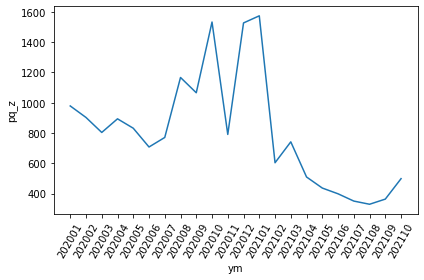

In [106]:
plt.figure(1)
plt.plot(one_cons_month["ym"], one_cons_month["pq_z"])
plt.xlabel("ym")
plt.ylabel("pq_z")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<h3>随便找一户挖矿户</h3>

In [107]:
pos_samples = cons_info[cons_info["IS_FLAG"] == 1]
pos_samples

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG
,,,,,,,,,,,,,,
1685,329833811,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,50.0,50.0,NaN,2008/10/31 8:21:00,NaN,240.0,2008/10/31,非临时用电,NaN,1
4012,2294741747,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,400.0,400.0,1.0,2016/7/13 17:37:00,NaN,12.0,2021/1/26,非临时用电,NaN,1
4392,2654985038,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,300.0,300.0,NaN,2018/10/17 8:28:00,NaN,120.0,2018/10/17 8:28:00,非临时用电,NaN,1
4422,2674563661,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,99.0,99.0,NaN,2018/11/22 16:45:00,NaN,120.0,2018/11/22 16:45:00,非临时用电,NaN,1
4773,2695447713,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,90.0,90.0,NaN,2019/1/10 15:36:00,NaN,120.0,2019/1/10 15:36:00,非临时用电,NaN,1
7387,1998335717,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2014/6/20 9:05:00,NaN,120.0,2014/6/20 9:05:00,非临时用电,NaN,1
7808,2482675592,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,95.0,95.0,NaN,2017/10/13 10:49:00,NaN,120.0,2017/10/13 10:49:00,非临时用电,NaN,1
8420,2614556942,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/8/16 9:34:00,NaN,120.0,2018/8/16 9:34:00,非临时用电,NaN,1
8699,2816697143,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,400.0,400.0,NaN,2019/9/6 18:03:00,NaN,120.0,2019/9/6 18:03:00,非临时用电,NaN,1


In [114]:
cons_id = 2614556942
one_cons_info = cons_info[cons_info["ID"] == cons_id]
one_cons_info

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG
,,,,,,,,,,,,,,
8420,2614556942,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/8/16 9:34:00,NaN,120.0,2018/8/16 9:34:00,非临时用电,NaN,1


In [115]:
one_cons_month = elec_month[elec_month["id"] == cons_id].sort_values(by="ym")
one_cons_month.head()

,id,ym,pq_f,pq_g,pq_p,pq_z
171864,2614556942,202001,2223,2222,2289,6734
171865,2614556942,202002,2278,2027,2239,6544
171866,2614556942,202003,1865,1820,1882,5567
171867,2614556942,202004,1963,2004,1991,5958
171868,2614556942,202005,1991,1860,1939,5790


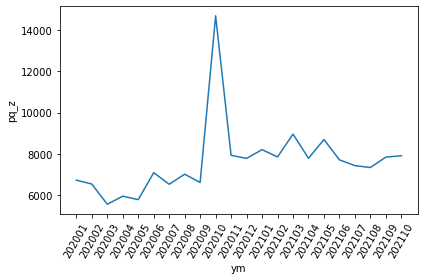

In [116]:
plt.figure(2)
plt.plot(one_cons_month["ym"], one_cons_month["pq_z"])
plt.xlabel("ym")
plt.ylabel("pq_z")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<h2>查看样本用电特征</h2>

In [5]:
cons_info_month = pd.merge(cons_info, elec_month, how="inner", left_on="ID", right_on="id")
cons_info_month.head()

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG,id,ym,pq_f,pq_g,pq_p,pq_z
0,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202001,258,83,0,341
1,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202002,204,64,0,268
2,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202003,130,88,0,218
3,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202004,219,150,1,370
4,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202005,342,149,0,491


<h3>查看正样本特征</h3>

In [43]:
cons_neg = cons_info_month[cons_info_month["IS_FLAG"] == 1]

In [44]:
(cons_neg[["ID", "pq_z"]].groupby("ID").agg("max") - cons_neg[["ID", "pq_z"]].groupby("ID").agg("min")).min()

pq_z    7993.0
dtype: float64

In [45]:
cons_neg[["ID", "pq_z"]].groupby("ID").agg("std").median()

pq_z    1633.683321
dtype: float64

<h1>kNN</h1>

In [191]:
df1 = pd.merge(cons_info, elec_month, how="inner", left_on="ID", right_on="id")

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG,id,ym,pq_f,pq_g,pq_p,pq_z
0,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202001,258,83,0,341
1,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202002,204,64,0,268
2,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202003,130,88,0,218
3,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202004,219,150,1,370
4,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0,329465205,202005,342,149,0,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194475,2529558569,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/1/30 14:40:00,NaN,120.0,2018/1/30 14:40:00,非临时用电,NaN,0,2529558569,202106,519,229,0,748
194476,2529558569,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/1/30 14:40:00,NaN,120.0,2018/1/30 14:40:00,非临时用电,NaN,0,2529558569,202107,525,220,1,746
194477,2529558569,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/1/30 14:40:00,NaN,120.0,2018/1/30 14:40:00,非临时用电,NaN,0,2529558569,202108,554,222,-1,775
194478,2529558569,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30.0,30.0,NaN,2018/1/30 14:40:00,NaN,120.0,2018/1/30 14:40:00,非临时用电,NaN,0,2529558569,202109,545,229,0,774


In [ ]:
df2 = 